In [1]:
%matplotlib inline
from analysistools import *

# Feature Importance
We'll start by looking at classifiers trained with the full list of features. Boosting parameters are all defaults.


In [2]:
features = make_feature_list()
base_path = "/swot2/features/MODEL_RUNS/00_ALL_FEATURES/train-test-split"
models = get_models(base_path)

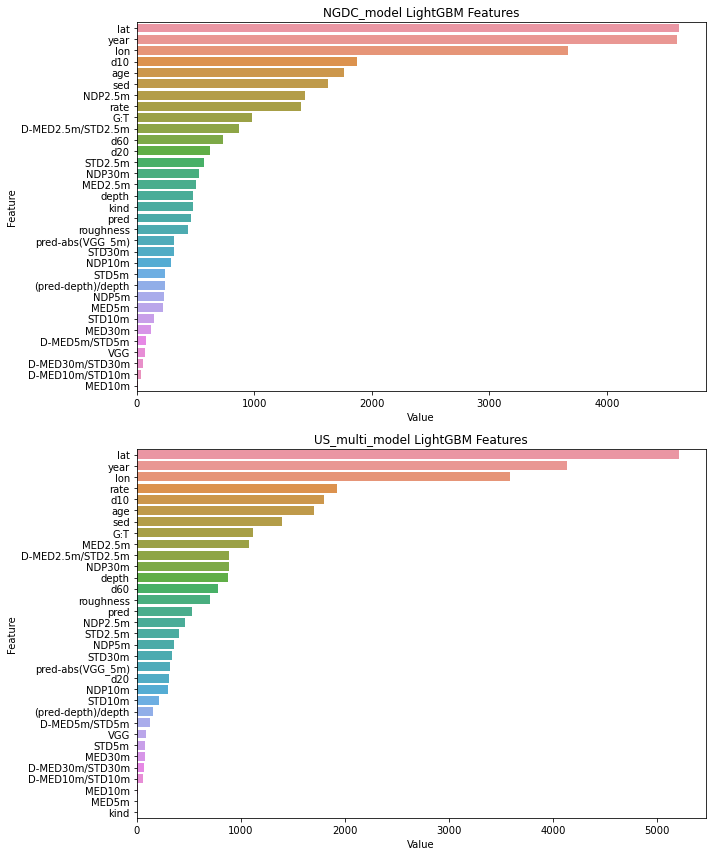

In [3]:
plot_ftr_importance(models,features)


## Remove features
We see that some of the most important features between the two models are lon, lat, and year. Those features might be biasing our model. What happens when we remove them?

In [5]:
features = remove_feature_from_list(features,['lon','lat','year'])
base_path = "/swot2/features/MODEL_RUNS/02_NO_LAT_LON_YR/train-test-split"
models = get_models(base_path)

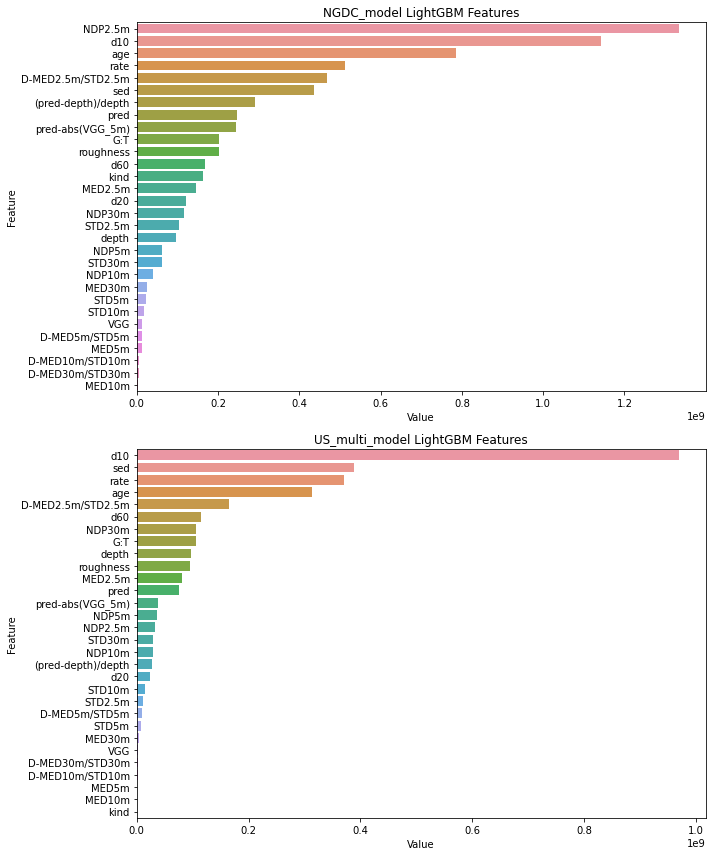

In [15]:
plot_ftr_importance(models,features)

### ~My hypothesis~
~Many of the features we're using here are not helping because they are not correlated with good and bad data. We are looking mostly at independent features from independent grids when we *should* be looking at how the multibeam data relate to themselves. For instance abs(pred-depth)/depth should be a useful feature, but it alone might not suggest the ping is bad but rather our predicted depth is bad. It depends on whether a single ping has a large difference (probably bad), or if there is a spatial grouping of pings with that large difference (probably good). Also, echosounder metadata is likely just as relevant, and we can't make use of it...~

## Adjusted Boosting parameters
There are some important parameters in the boosting routine that were set by default to inappropriate values. So, in the following runs, we changed:

    1. iterations 1000 -> 200
    2. num leaves 31 -> 7
    3. n data per leaf 1 -> 5000

In [6]:
base_path = "/swot2/features/MODEL_RUNS/03_CHANGE_PARAMS/train-test-split"
models = get_models(base_path)

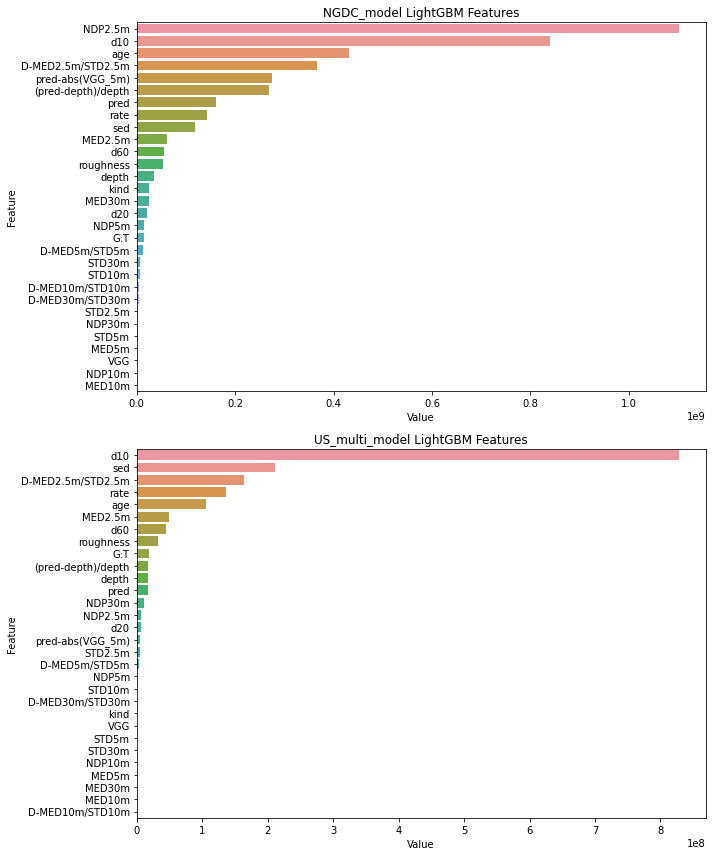

In [3]:
plot_ftr_importance(models,features)

## Remove d10 feature
Now, we start removing features again. First, we remove d10, the track density within 10 km.

In [11]:
features = remove_feature_from_list(features,['d10'])
base_path = "/swot2/features/MODEL_RUNS/04_NO_d10/train-test-split"
models = get_models(base_path)

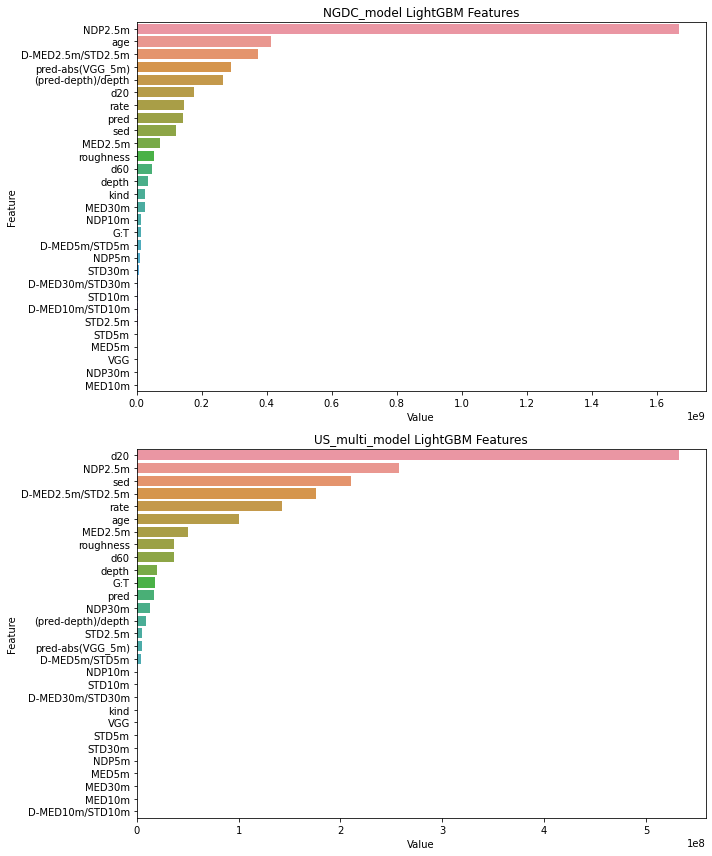

In [4]:
plot_ftr_importance(models,features)

## Remove d20 and NDP2.5
Remove two more features. D20 is the track density within 20 km. NDP2.5m is the number of data points in a 2.5 min (~5km) grid cell.

In [13]:
features = remove_feature_from_list(features,['d20','NDP2.5m'])
base_path = "/swot2/features/MODEL_RUNS/05_NO_d20/train-test-split"
models = get_models(base_path)

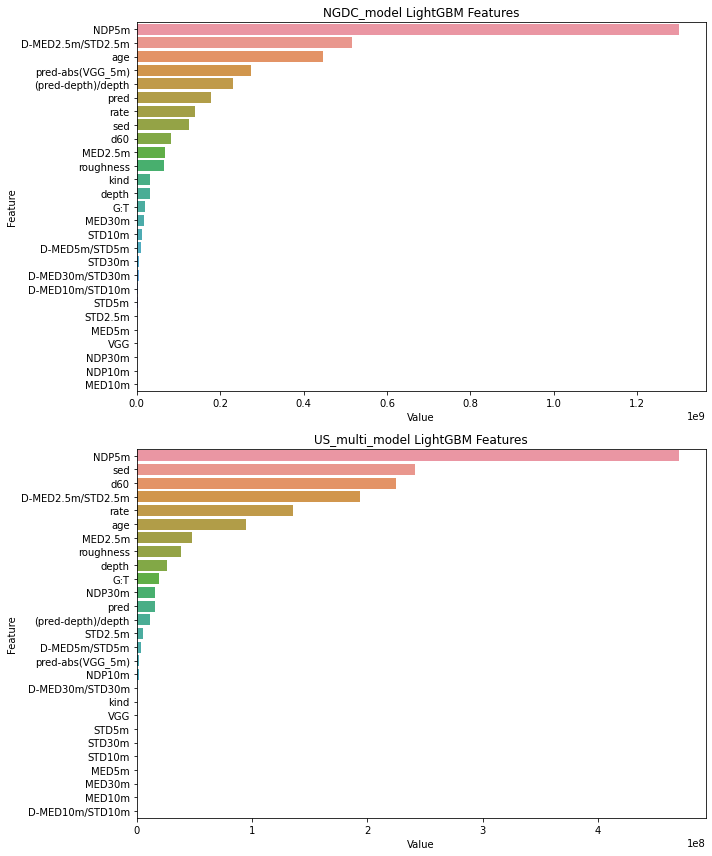

In [4]:
plot_ftr_importance(models,features)

## Remove NDP5m
Remove NDP5m, number of data points in a 5 min (~10 km) grid cell.

In [3]:
features = remove_feature_from_list(features,['lat','lon','year','d10','d20','NDP2.5m','NDP5m'])
base_path = "/swot2/features/MODEL_RUNS/06_NO_NDP5/train-test-split"
models = get_models(base_path)

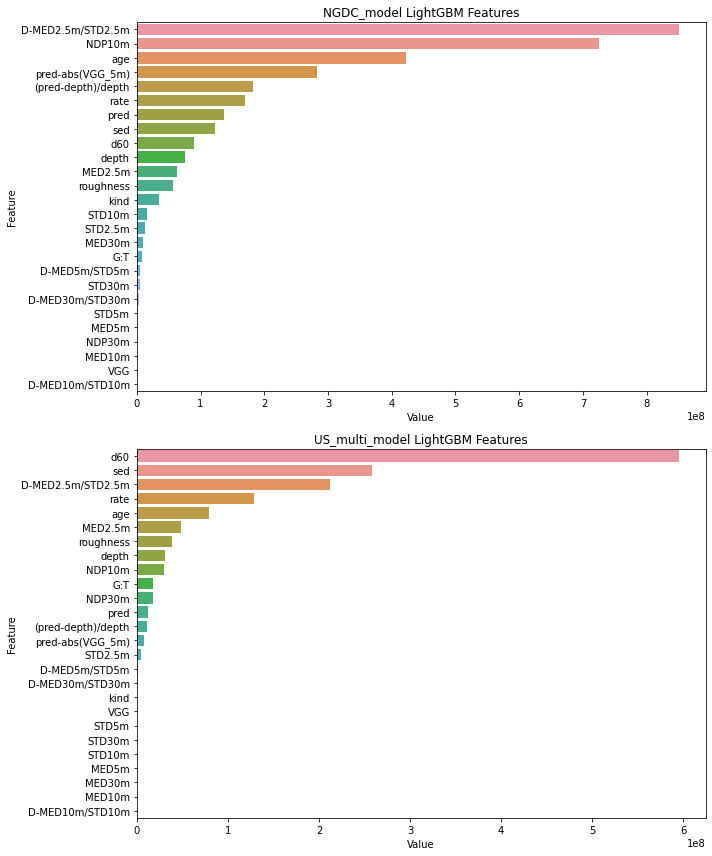

In [4]:
plot_ftr_importance(models,features)

## 500 rounds
We could probably continue removing features, but I wanted to adjust some parameters. I increased the number of iterations up to 500. I don't know what is ideal, but if you perform more iterations, you can always choose to use a smaller number when testing data.

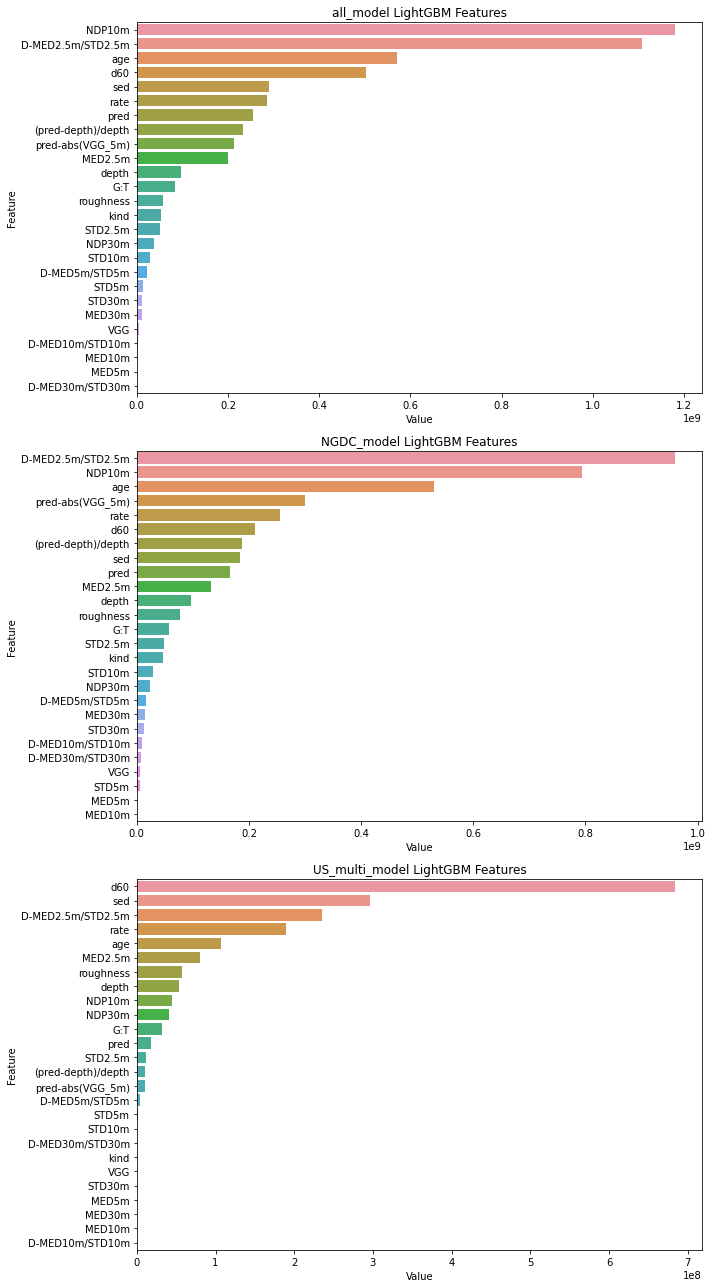

In [3]:
features = remove_feature_from_list(features,['lat','lon','year','d10','d20','NDP2.5m','NDP5m'])
base_path = "/swot2/features/MODEL_RUNS/07_500_ROUNDS/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

## Overfitting Parameters tuning
We'll start adjusting some important parameters one at a time. The lightgbm docs suggest tinkering with some of the following parameters to deal with overfitting:

    1. feature_fraction
    2. bagging_fraction and bagging_freq
    3. extra_trees (True/False)
    4. max_bins

## Feature fraction = 0.8

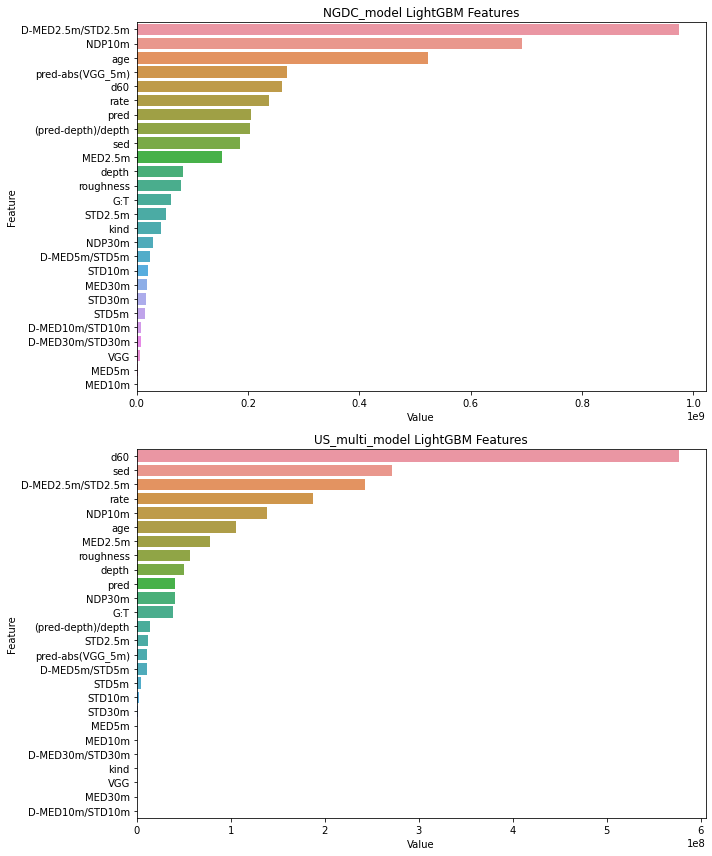

In [2]:
features = make_feature_list()
features = remove_feature_from_list(features,['lat','lon','year','d10','d20','NDP2.5m','NDP5m'])
base_path = "/swot2/features/MODEL_RUNS/08_FEATURE_FRACTION/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

## Bagging fraction and frequency
Bagging fraction = 0.8, frequency = 25

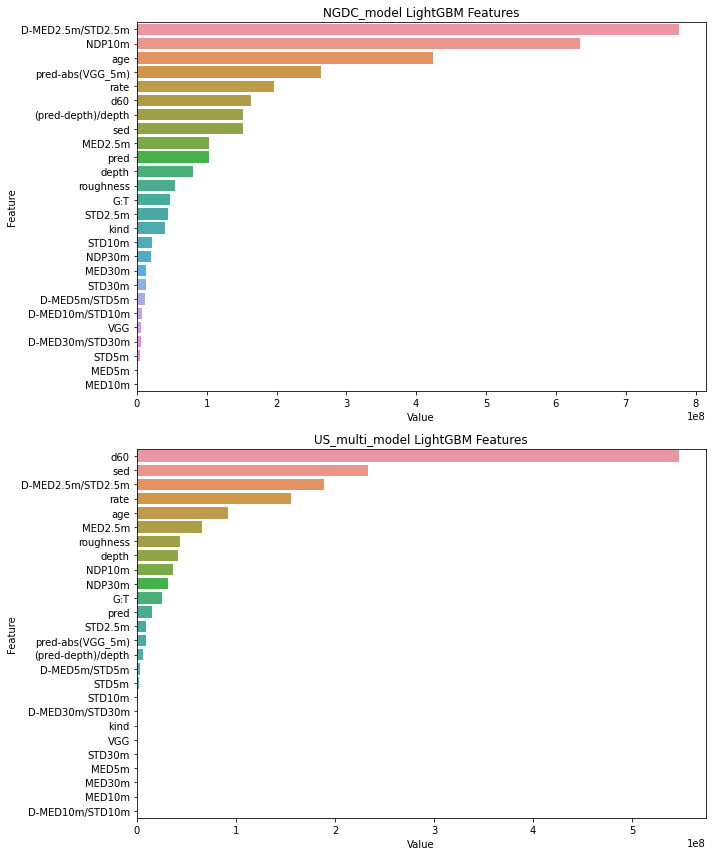

In [3]:
base_path = "/swot2/features/MODEL_RUNS/09_BAGGING_FRACTION/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

## Extra trees = true

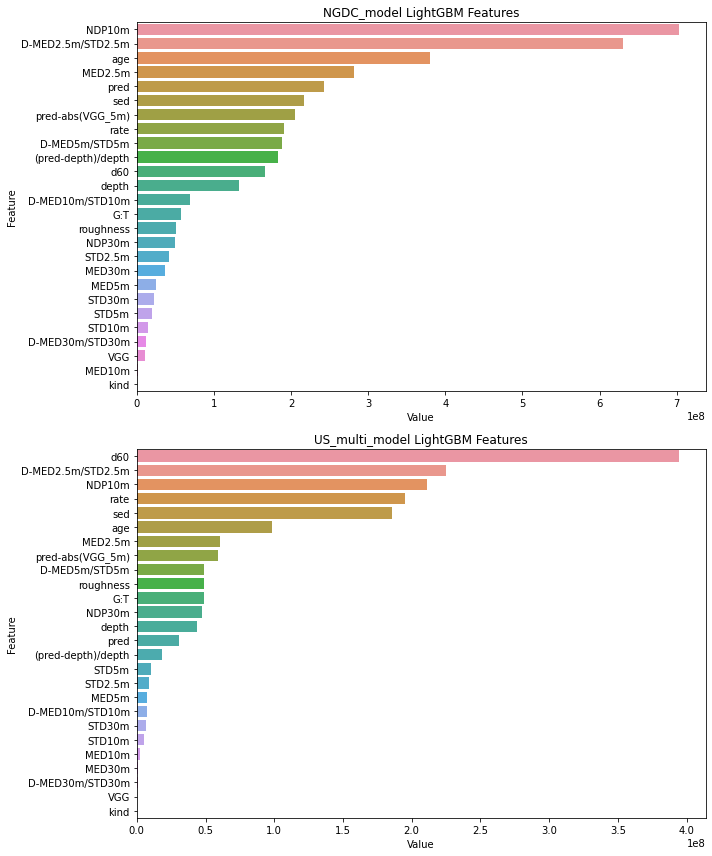

In [4]:
base_path = "/swot2/features/MODEL_RUNS/10_EXTRA_TREES/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

## Max bins = 127
default is max bins = 255, so basically halving the number of bins

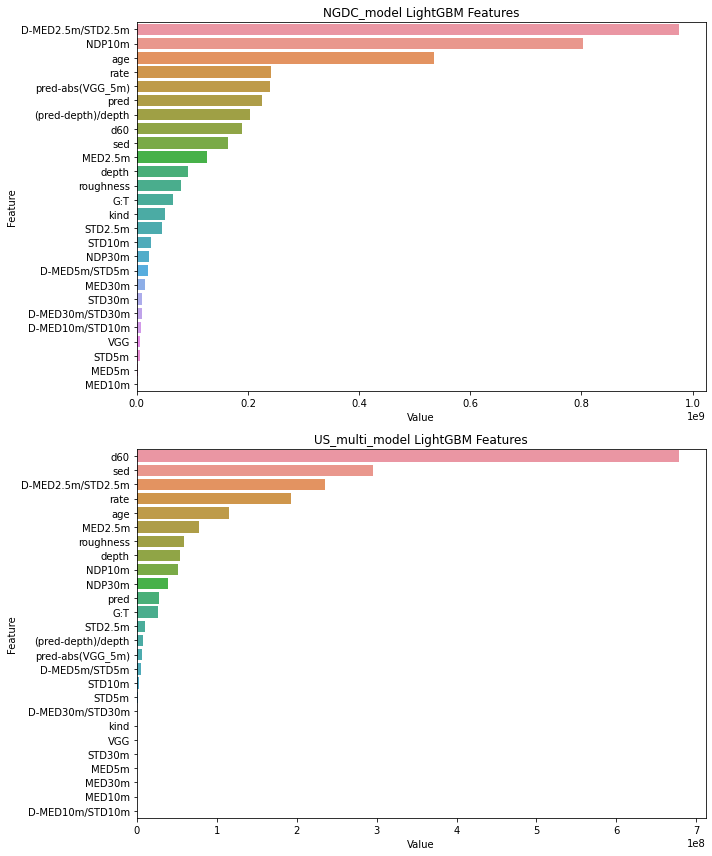

In [5]:
base_path = "/swot2/features/MODEL_RUNS/11_MAX_BINS/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

## Remove NDP10 and d60

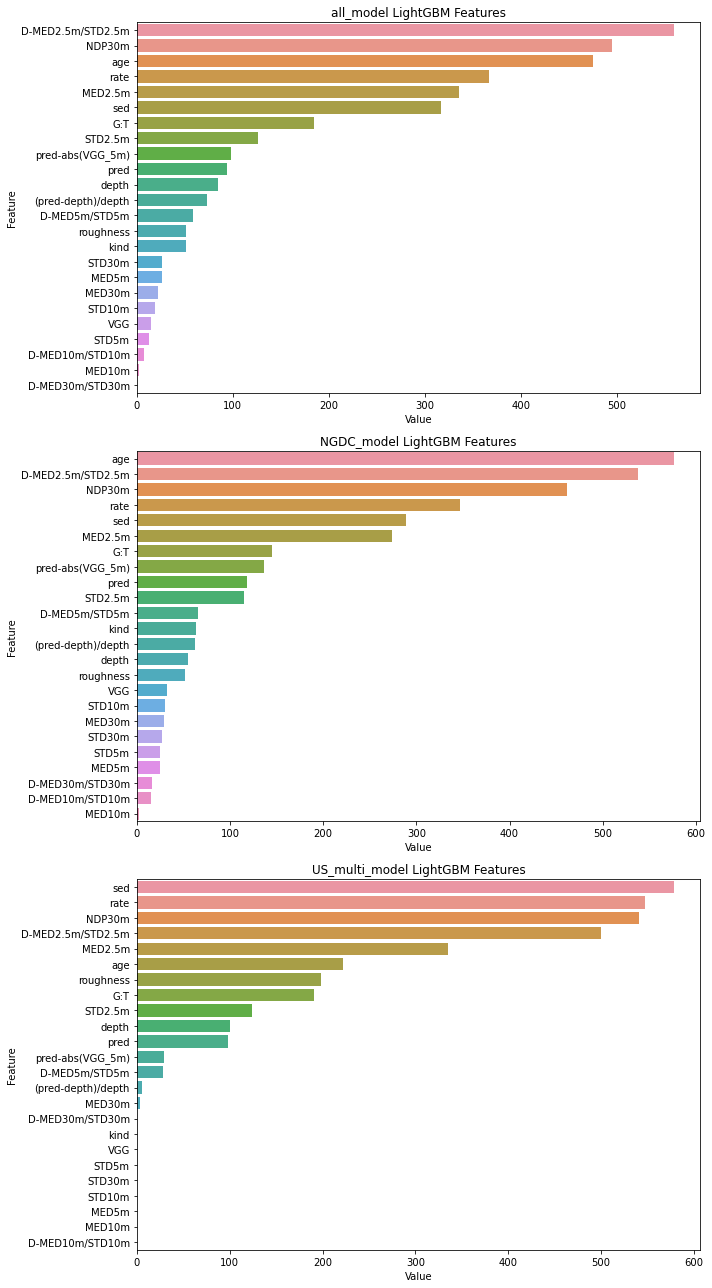

In [4]:
features = make_feature_list()
features = remove_feature_from_list(features,['lat','lon','year','d10','d20','d60','NDP2.5m','NDP5m','NDP10m'])
base_path = "/swot2/features/MODEL_RUNS/12_NO_NDP10/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

# NDP30 + a few parameters
Here's a little mini-test I needed to run, there are three model runs. First, I removed NDP30 which is sort of the last of the "spatial" features that I think would bias the model in favor of lat/lon it has already seen.

The next test is to increase the learning rate to 0.05. Initially, this was set at 0.01 and there were 1000 iterations. When I decreased the number of iterations to 500, I should've increased the learning rate.

Finally, I added L2 regularization to the cost function with lambda_l2 = 1.0

I'm not sure how these latter two tests will affect the feature importance.

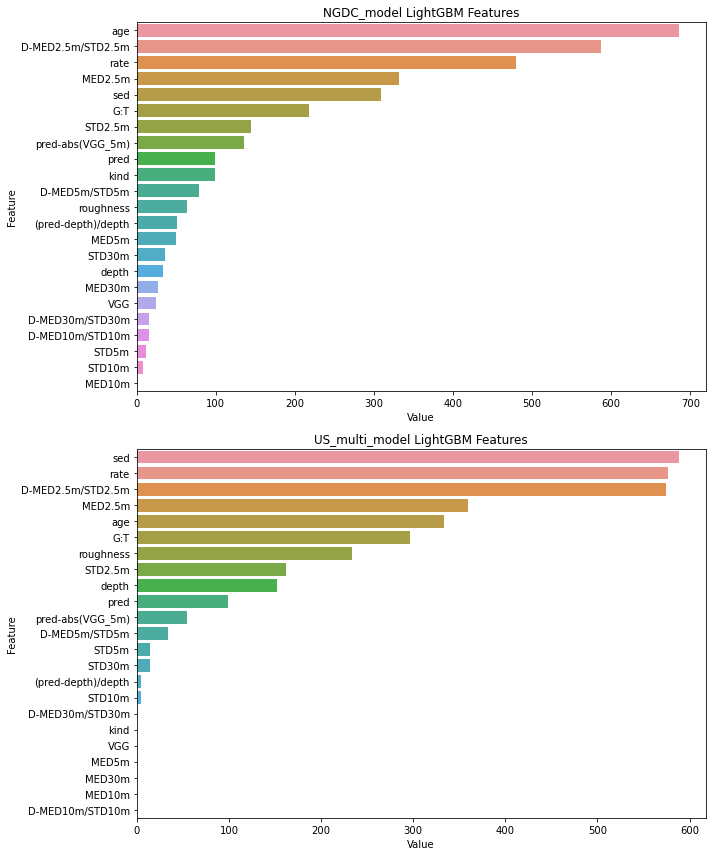

In [2]:
features = make_feature_list()
features = remove_feature_from_list(features,['lat','lon','year','d10','d20','d60','NDP2.5m','NDP5m','NDP10m','NDP30m'])
base_path = "/swot2/features/MODEL_RUNS/13_NO_NDP30/train-test-split"
models = get_models(base_path)
plot_ftr_importance(models,features)

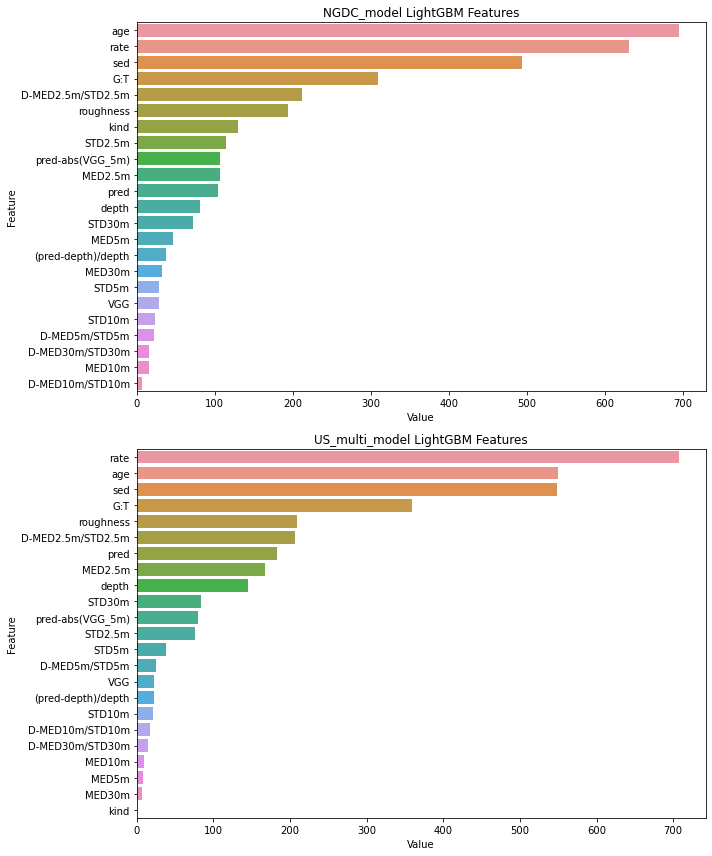

In [3]:
base_path = "/swot2/features/MODEL_RUNS/13_NO_NDP30/learning_rate"
models = get_models(base_path)
plot_ftr_importance(models,features)

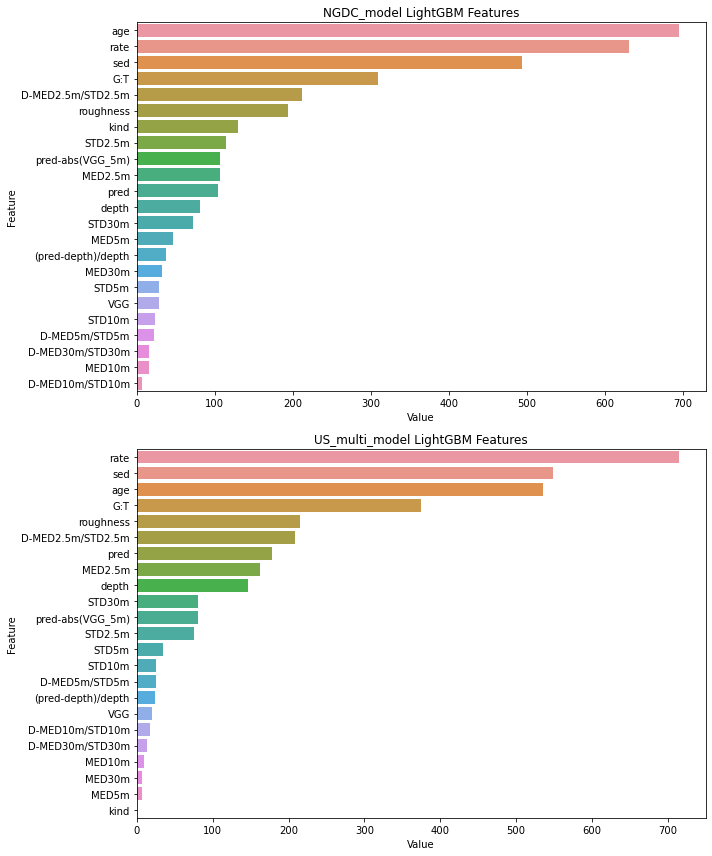

In [4]:
base_path = "/swot2/features/MODEL_RUNS/13_NO_NDP30/lambda_l2"
models = get_models(base_path)
plot_ftr_importance(models,features)